In [2]:
import tensorflow as tf
import numpy as np

In [3]:
from pinn_solver import PINNSolver

In [4]:
from pinn_neural_net import PINN_NeuralNet

In [5]:
DTYPE='float32'
tf.keras.backend.set_floatx(DTYPE)

# Set constants
pi = tf.constant(np.pi, dtype=DTYPE)
viscosity = .01/pi

# Define initial condition
def fun_u_0(x):
    return -tf.sin(pi * x)

# Define boundary condition
def fun_u_b(t, x):
    n = x.shape[0]
    return tf.zeros((n,1), dtype=DTYPE)

# Set number of data points
N_0 = 50
N_b = 50
N_r = 10000

# Set boundary
tmin = 0.
tmax = 1.
xmin = -1.
xmax = 1.

# Lower bounds
lb = tf.constant([tmin, xmin], dtype=DTYPE)
# Upper bounds
ub = tf.constant([tmax, xmax], dtype=DTYPE)

# Set random seed for reproducible results
tf.random.set_seed(0)

# Draw uniform sample points for initial boundary data
t_0 = tf.ones((N_0,1), dtype=DTYPE)*lb[0]
x_0 = tf.random.uniform((N_0,1), lb[1], ub[1], dtype=DTYPE)
X_0 = tf.concat([t_0, x_0], axis=1)

# Evaluate intitial condition at x_0
u_0 = fun_u_0(x_0)

# Boundary data
t_b = tf.random.uniform((N_b,1), lb[0], ub[0], dtype=DTYPE)
x_b = lb[1] + (ub[1] - lb[1]) * tf.keras.backend.random_bernoulli((N_b,1), 0.5, dtype=DTYPE)
X_b = tf.concat([t_b, x_b], axis=1)

# Evaluate boundary condition at (t_b,x_b)
u_b = fun_u_b(t_b, x_b)

# Draw uniformly sampled collocation points
t_r = tf.random.uniform((N_r,1), lb[0], ub[0], dtype=DTYPE)
x_r = tf.random.uniform((N_r,1), lb[1], ub[1], dtype=DTYPE)
X_r = tf.concat([t_r, x_r], axis=1)

# Collect boundary and inital data in lists
X_data = [X_0, X_b]
u_data = [u_0, u_b]

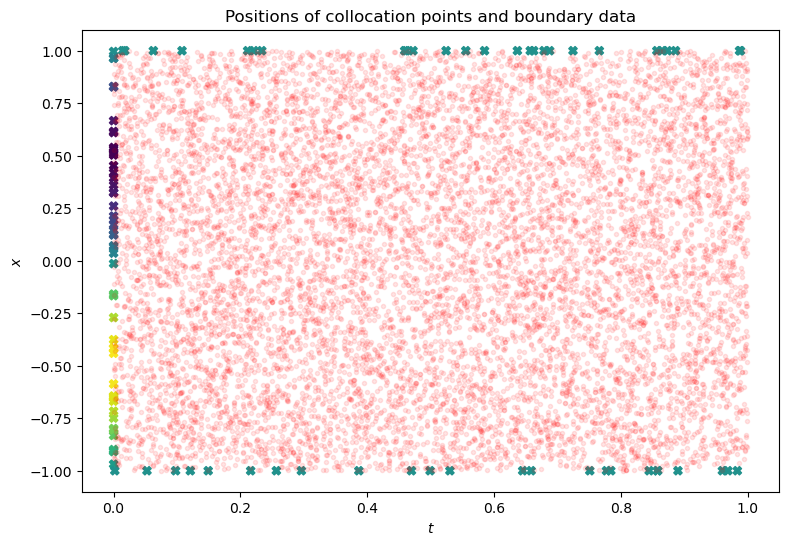

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,6))
plt.scatter(t_0, x_0, c=u_0, marker='X', vmin=-1, vmax=1)
plt.scatter(t_b, x_b, c=u_b, marker='X', vmin=-1, vmax=1)
plt.scatter(t_r, x_r, c='r', marker='.', alpha=0.1)
plt.xlabel('$t$')
plt.ylabel('$x$')

plt.title('Positions of collocation points and boundary data');
#plt.savefig('Xdata_Burgers.pdf', bbox_inches='tight', dpi=300)

In [7]:
from time import time

# Initialize model
model = PINN_NeuralNet(lb, ub)
model.build(input_shape=(None,2))

# Initilize PINN solver
solver = PINNSolver(model, X_r)

# Decide which optimizer should be used
mode = 'TFoptimizer'

# Start timer
t0 = time()

# Choose optimizer
lr = tf.keras.optimizers.schedules.PiecewiseConstantDecay([1000,3000],[1e-2,1e-3,5e-4])
optim = tf.keras.optimizers.Adam(learning_rate=lr)
solver.solve_with_TFoptimizer(optim, X_data, u_data, N=4001)
    
# Print computation time
print('\nComputation time: {} seconds'.format(time()-t0))

It 00000: loss = 9.12112176e-01
It 00050: loss = 1.58004373e-01
It 00100: loss = 1.59379005e-01
It 00150: loss = 9.11965296e-02
It 00200: loss = 7.91617334e-02
It 00250: loss = 7.58695081e-02
It 00300: loss = 1.24586508e-01
It 00350: loss = 7.99824297e-02
It 00400: loss = 1.73047319e-01
It 00450: loss = 6.32304400e-02
It 00500: loss = 3.94119695e-02
It 00550: loss = 1.26228377e-01
It 00600: loss = 8.88681710e-02
It 00650: loss = 6.00987487e-02
It 00700: loss = 7.41872489e-02
It 00750: loss = 1.75396100e-01
It 00800: loss = 6.33698255e-02
It 00850: loss = 2.80072074e-02
It 00900: loss = 3.79275940e-02
It 00950: loss = 1.92591473e-02
It 01000: loss = 5.06008379e-02
It 01050: loss = 4.12079915e-02
It 01100: loss = 3.46336514e-02
It 01150: loss = 2.81570293e-02
It 01200: loss = 2.26174463e-02
It 01250: loss = 1.86631586e-02
It 01300: loss = 1.60471778e-02
It 01350: loss = 1.42955435e-02
It 01400: loss = 1.29161719e-02
It 01450: loss = 1.18845236e-02
It 01500: loss = 1.10088829e-02
It 01550

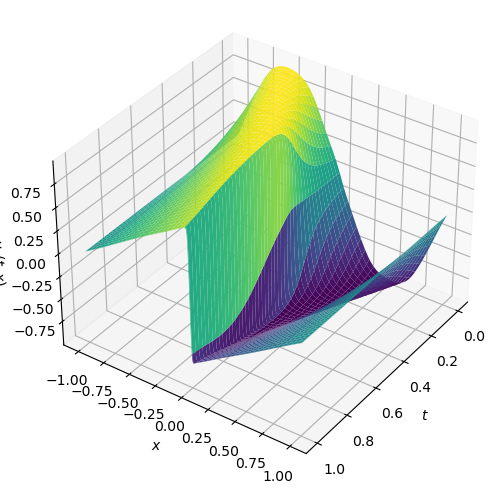

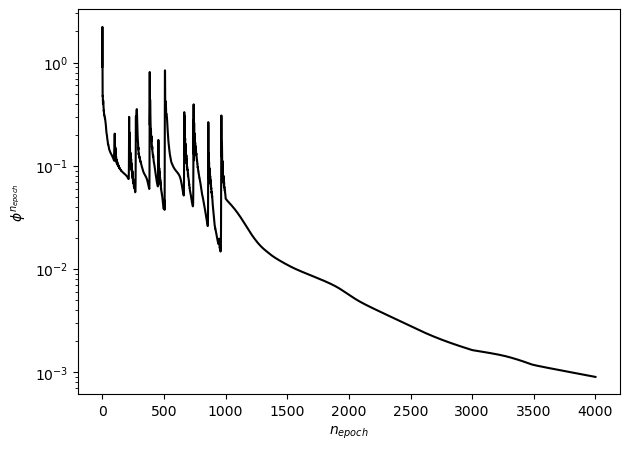

In [8]:
solver.plot_solution();
solver.plot_loss_history();